<a href="https://colab.research.google.com/github/Astraluuu/Causalities/blob/main/Test_Causality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing out Granger causality test for SDG 7 indicators interlinking
Adapted from https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/

In [1]:
# Import all required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Prepare and load dataset

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Astraluuu/Causalities/main/room102_data.csv'
df = pd.read_csv(url)
df.head()

,year,sdg7_1_1,sdg7_1_2,sdg7_2_1,sdg7_3_1,sdg7a_1,sdg7b_1
0,2000,75,37.90,33.8,4.70,12.6,49
1,2001,76,39.15,32.8,4.34,0.0,49
2,2002,77,39.60,31.8,4.24,52.1,50
3,2003,77,40.10,30.8,4.04,30.2,54
4,2004,88,40.90,30.1,3.76,6.1,53


In [ ]:
df.dtypes

year          int64
sdg7_1_1      int64
sdg7_1_2    float64
sdg7_2_1    float64
sdg7_3_1    float64
sdg7a_1     float64
sdg7b_1       int64
dtype: object

In [ ]:
df.describe()

,year,sdg7_1_1,sdg7_1_2,sdg7_2_1,sdg7_3_1,sdg7a_1,sdg7b_1
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2010.000000,85.619048,41.759524,31.423810,3.340952,40.671429,53.333333
std,6.204837,6.507505,2.451817,2.322693,0.578143,53.802882,4.618802
min,2000.000000,75.000000,37.900000,26.800000,2.660000,0.000000,49.000000
25%,2005.000000,80.000000,40.700000,30.100000,2.900000,2.000000,50.000000
50%,2010.000000,87.000000,40.900000,32.300000,3.140000,12.600000,52.000000
75%,2015.000000,90.000000,42.200000,33.200000,3.690000,54.800000,55.000000
max,2020.000000,96.000000,48.000000,34.100000,4.700000,198.500000,62.000000


# Visualize time-series data

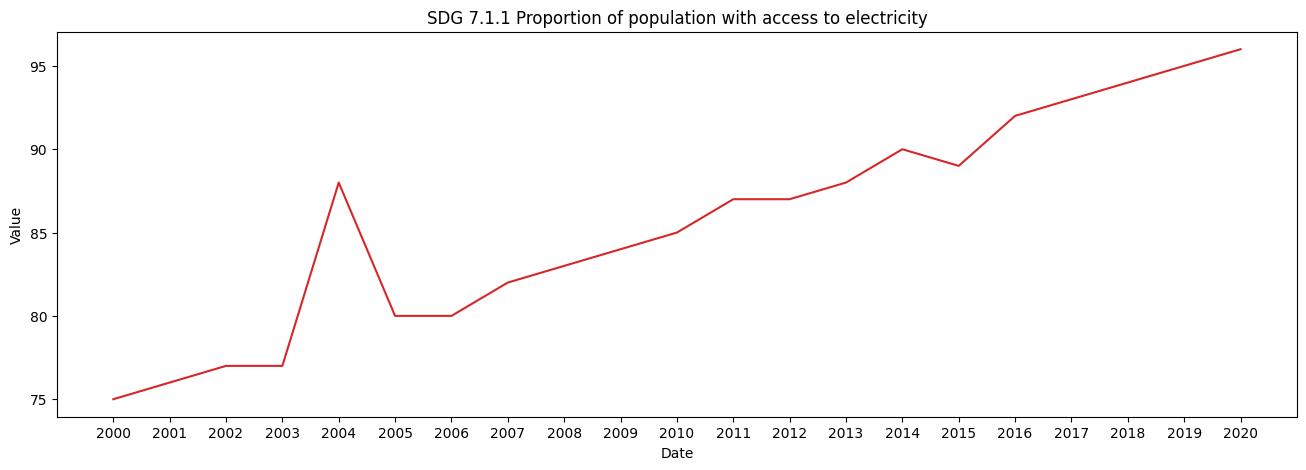

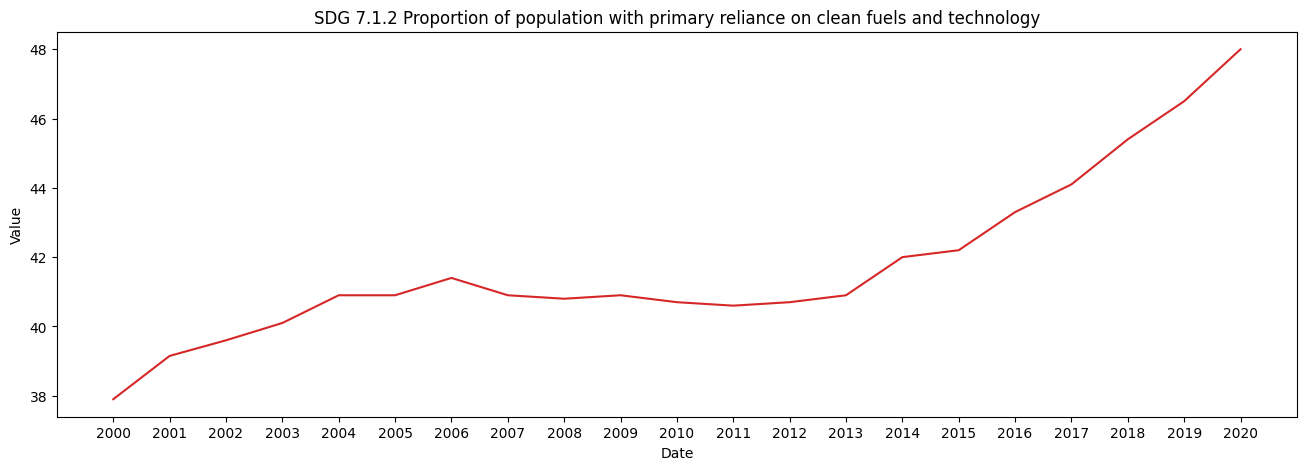

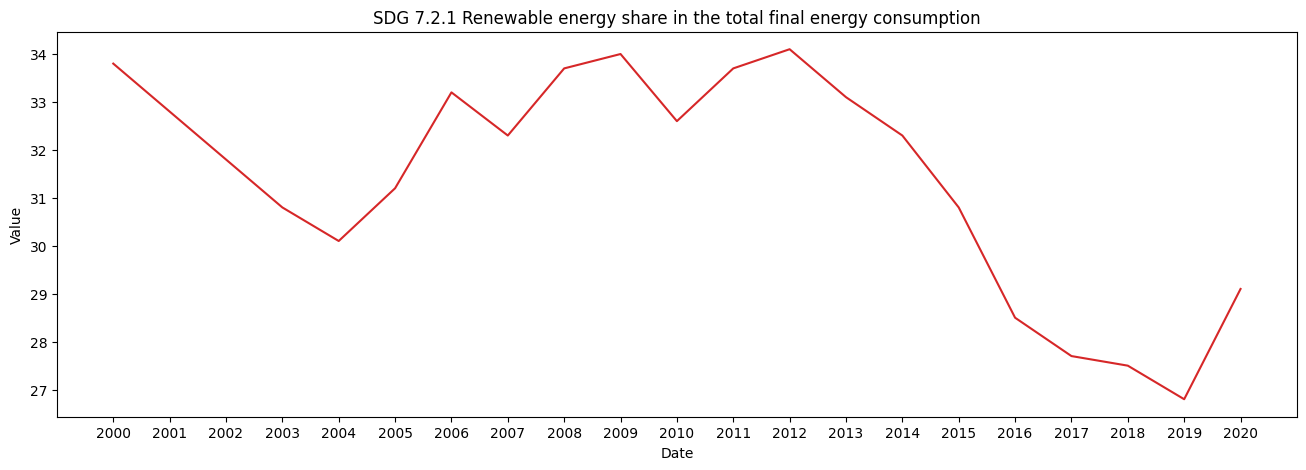

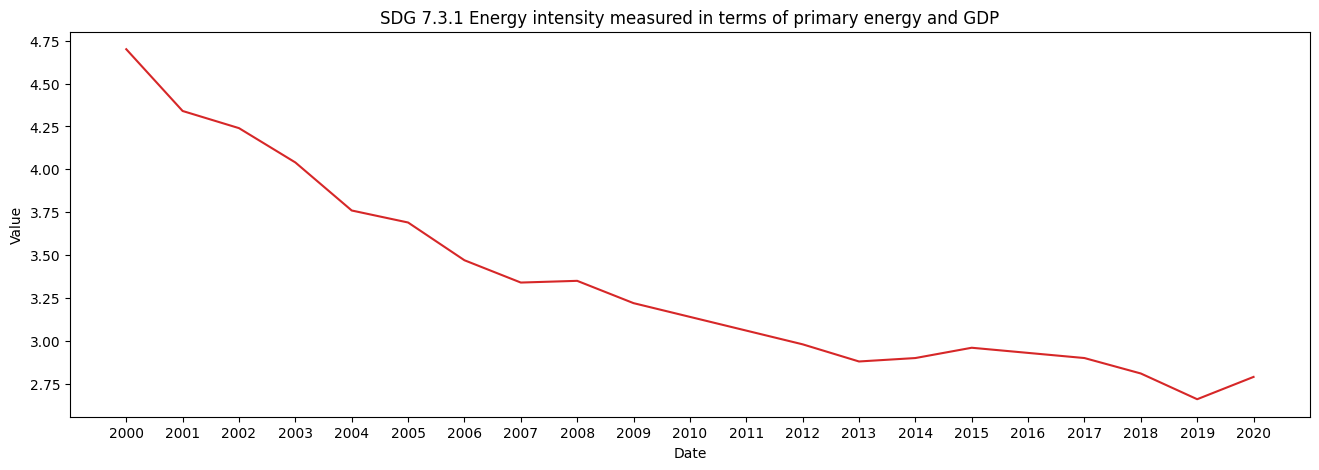

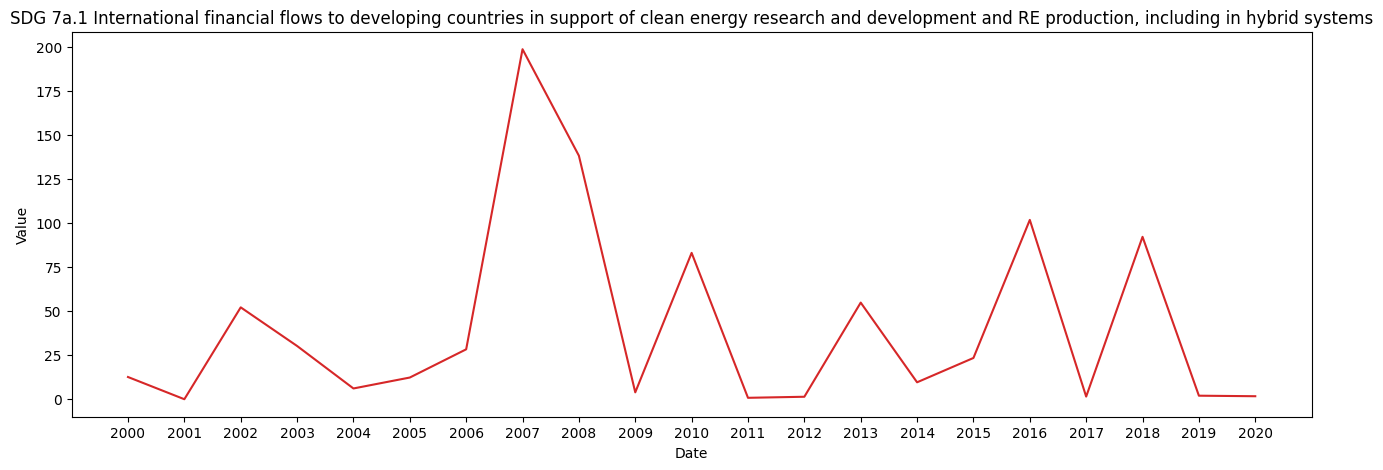

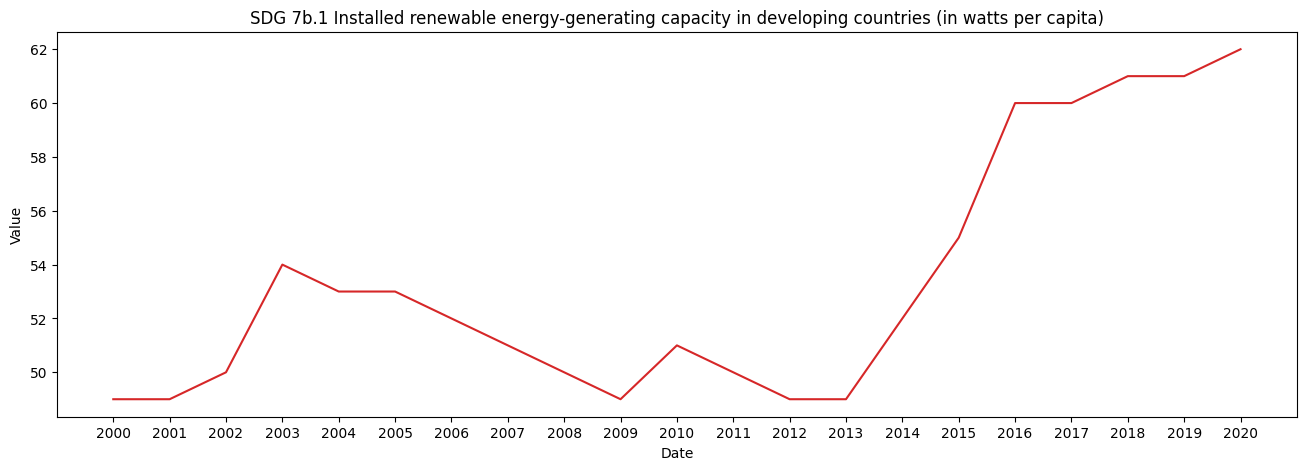

In [ ]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
    plt.show()
plot_df(df, x=df.year, y=df.sdg7_1_1, title='SDG 7.1.1 Proportion of population with access to electricity')
plot_df(df, x=df.year, y=df.sdg7_1_2, title='SDG 7.1.2 Proportion of population with primary reliance on clean fuels and technology')
plot_df(df, x=df.year, y=df.sdg7_2_1, title='SDG 7.2.1 Renewable energy share in the total final energy consumption')
plot_df(df, x=df.year, y=df.sdg7_3_1, title='SDG 7.3.1 Energy intensity measured in terms of primary energy and GDP')
plot_df(df, x=df.year, y=df.sdg7a_1, title='SDG 7a.1 International financial flows to developing countries in support of clean energy research and development and RE production, including in hybrid systems')
plot_df(df, x=df.year, y=df.sdg7b_1, title='SDG 7b.1 Installed renewable energy-generating capacity in developing countries (in watts per capita)')

# ADF Test to check whether time-series data is stationary or not

In [ ]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df['sdg7_1_1'])



Results of Dickey-Fuller Test:
Test Statistic                 -0.549706
p-value                         0.881946
#Lags Used                      2.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [ ]:
-0.549706 > -3.042046


True

In [ ]:
# @title ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['sdg7_1_1'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -0.5497059272082117
p-value: 0.8819463717179712
critical_values: {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}
Series is not stationary


In [ ]:
result = adfuller(df['sdg7_1_2'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


In [ ]:
result = adfuller(df['sdg7_2_1'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


Test Statistics: -3.479278676223279
p-value: 0.00853548450547306
critical_values: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
Series is stationary


In [ ]:
result = adfuller(df['sdg7_3_1'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


Test Statistics: -2.534201290702493
p-value: 0.10737296178936018
critical_values: {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}
Series is not stationary


In [ ]:
result = adfuller(df['sdg7a_1'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


Test Statistics: -0.7117422919673009
p-value: 0.8436845296975795
critical_values: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
Series is not stationary


In [ ]:
result = adfuller(df['sdg7b_1'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


Test Statistics: -0.07646410805303784
p-value: 0.9517329236296725
critical_values: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}
Series is not stationary


# **Data Transformation**
Granger causality test is carried out only on **stationary data** and since indicators 7.1.1, 7.1.2, 7.3.1, 7a.1 and 7b.1 are non-stationary,  we need to transform the data by using certain methods to make it stationary. In this case, we use **first-order differencing**.

In [ ]:
df_transformed = df.diff().dropna()
df = df.iloc[1:]
print(df.shape)
df_transformed.shape

(20, 7)


(20, 7)

In [ ]:
df_transformed.head()

,year,sdg7_1_1,sdg7_1_2,sdg7_2_1,sdg7_3_1,sdg7a_1,sdg7b_1
1,1.0,1.0,1.25,-1.0,-0.36,-12.6,0.0
2,1.0,1.0,0.45,-1.0,-0.10,52.1,1.0
3,1.0,0.0,0.50,-1.0,-0.20,-21.9,4.0
4,1.0,11.0,0.80,-0.7,-0.28,-24.1,-1.0
5,1.0,-8.0,0.00,1.1,-0.07,6.2,0.0


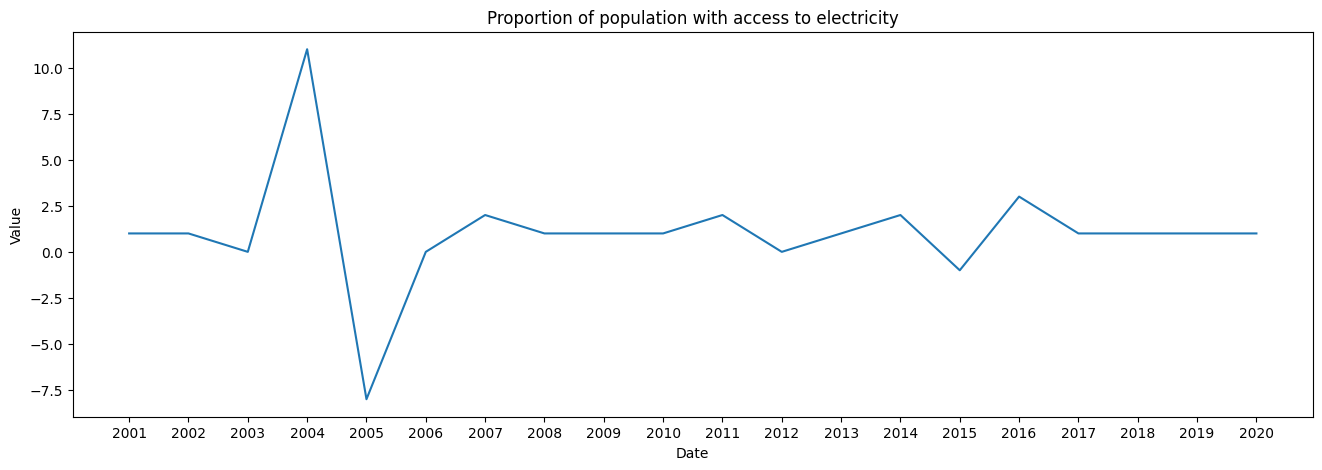

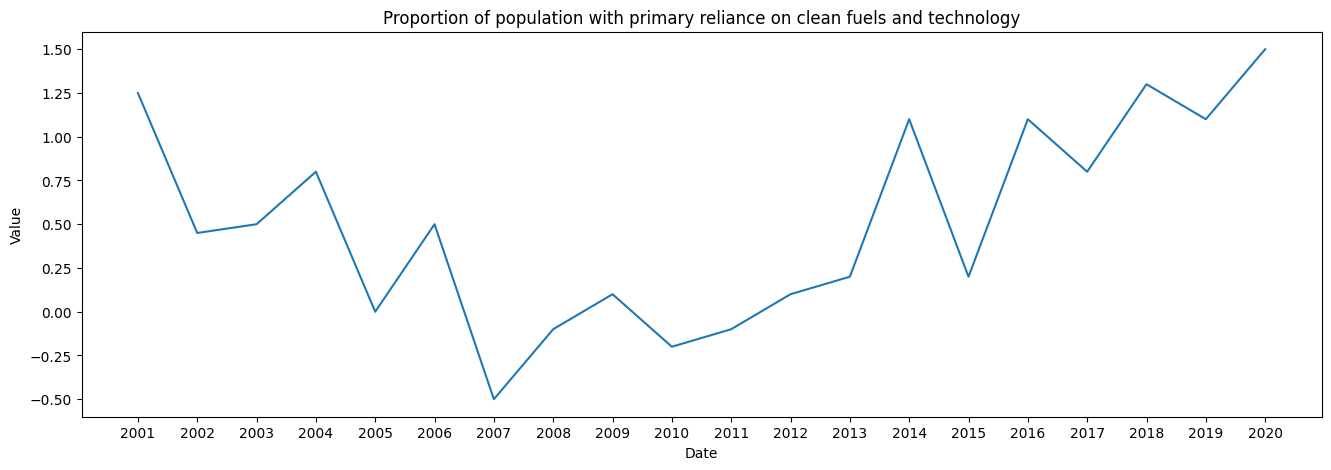

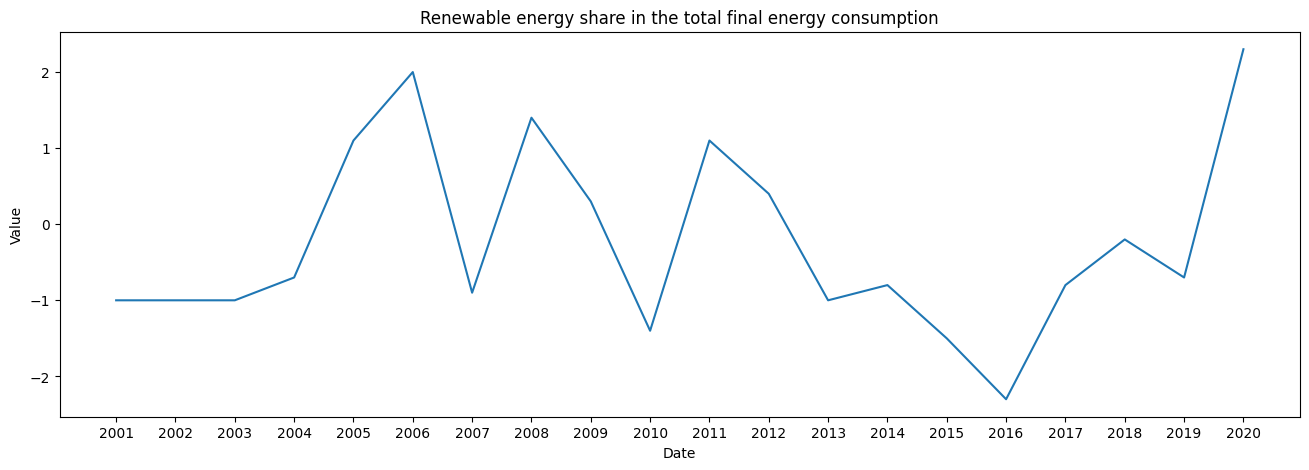

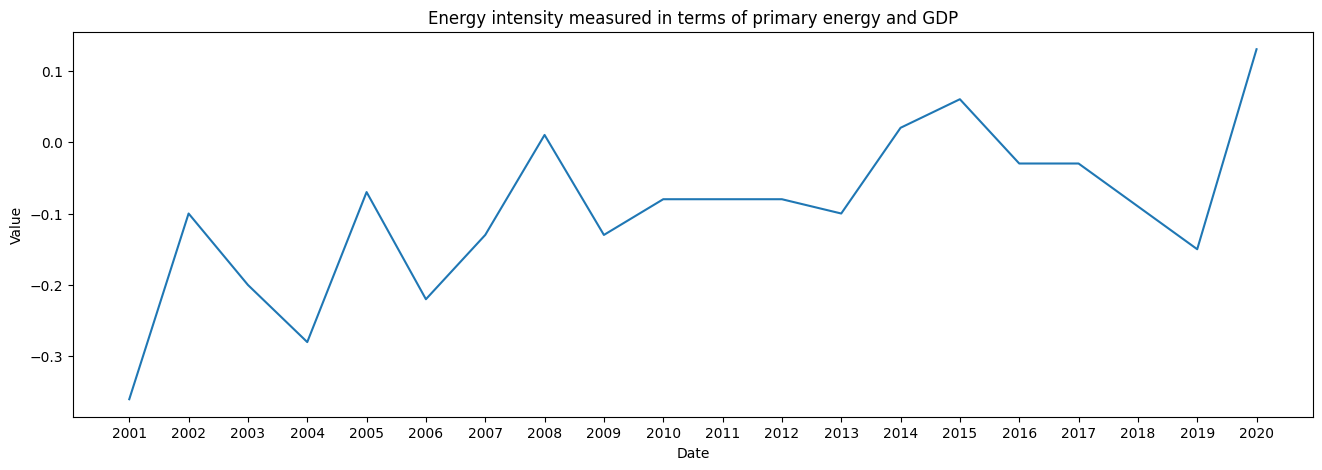

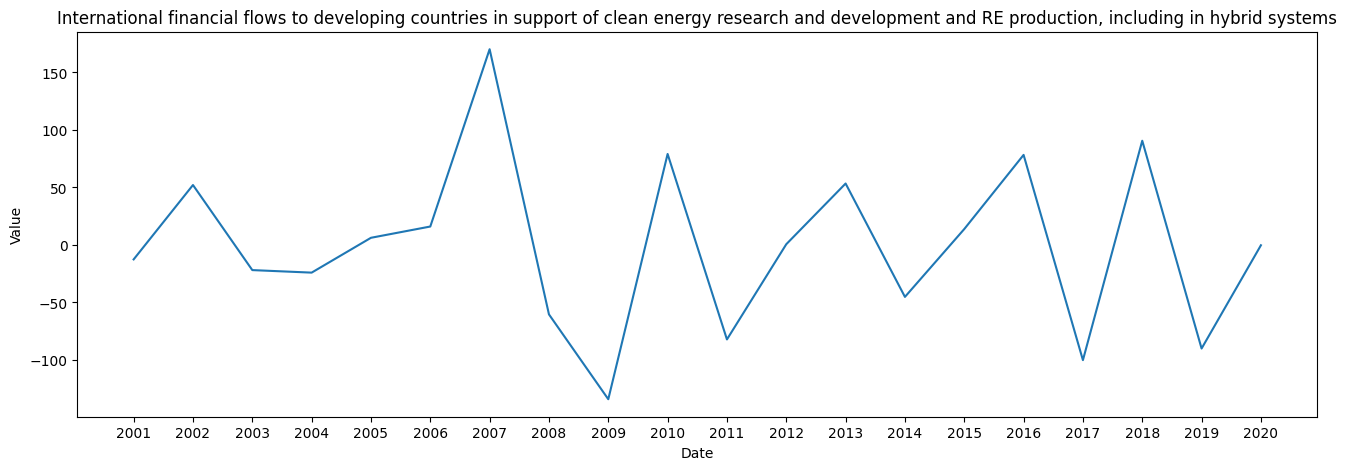

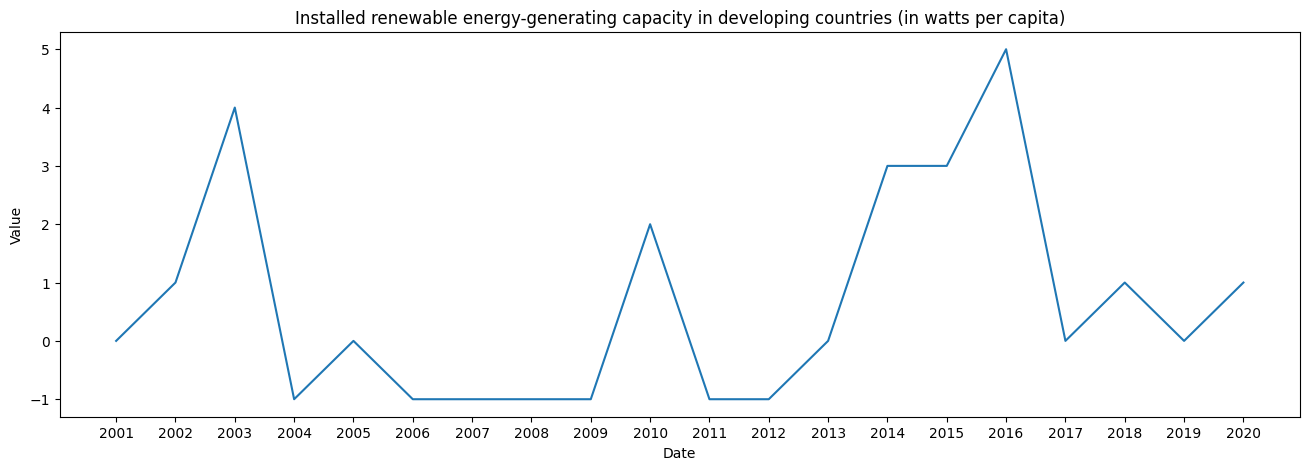

In [ ]:
def plot_td(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
    plt.show()
plot_td(df_transformed, x=df.year, y=df_transformed.sdg7_1_1, title='Proportion of population with access to electricity')
plot_td(df_transformed, x=df.year, y=df_transformed.sdg7_1_2, title='Proportion of population with primary reliance on clean fuels and technology')
plot_td(df_transformed, x=df.year, y=df_transformed.sdg7_2_1, title='Renewable energy share in the total final energy consumption')
plot_td(df_transformed, x=df.year, y=df_transformed.sdg7_3_1, title='Energy intensity measured in terms of primary energy and GDP')
plot_td(df_transformed, x=df.year, y=df_transformed.sdg7a_1, title='International financial flows to developing countries in support of clean energy research and development and RE production, including in hybrid systems')
plot_td(df_transformed, x=df.year, y=df_transformed.sdg7b_1, title='Installed renewable energy-generating capacity in developing countries (in watts per capita)')


In [ ]:
# @title Default title text
result = adfuller(df_transformed['sdg7b_1'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -3.2188697601634555
p-value: 0.018918077965793496
critical_values: {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}
Series is stationary


# Testing Granger causality

Sample hypothesis: \\
*$H_0$:* Growth in the SDG 7.1.1 (electricity access) does not granger cause growth in SDG 7b.1 (generating capacity for current installed RE technologies). \\
*$H_A$:* Growth in SDG 7.1.1 (electricity access) granger causes a growth in SDG 7b.1 (generating capacity for current installed RE technologies).

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df_transformed[['sdg7_1_1', 'sdg7b_1']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5962  , p=0.0478  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=5.4580  , p=0.0195  , df=1
likelihood ratio test: chi2=4.7979  , p=0.0285  , df=1
parameter F test:         F=4.5962  , p=0.0478  , df_denom=16, df_num=1


{1: ({'ssr_ftest': (4.596226000343614, 0.04775103939866543, 16.0, 1),
   'ssr_chi2test': (5.458018375408042, 0.01947872508210084, 1),
   'lrtest': (4.797863525196149, 0.02849505204507546, 1),
   'params_ftest': (4.59622600034361, 0.04775103939866549, 16.0, 1.0)},
   array([[0., 1., 0.]])])}